# REPERTOIRE

In [1]:
# C:\Users\dieud\Documents\OPENCLASSROOMS\FORMATION_DATA_SCIENTIST\PROJETS_DS_OCR\P6_FIN
# PROJET5_DATA_SCIENTIST_OCR
# Changement du repertoire: A ne plus changer.
import os
os.chdir('C://Users//dieud//Documents//OPENCLASSROOMS//FORMATION_DATA_SCIENTIST//PROJETS_DS_OCR//P6_FIN')

In [2]:
#!pip install missingno 

In [3]:
#pip install tensorflow

In [4]:
#!pip install --upgrade tensorflow_hub

In [5]:
#!pip install opencv-contrib-python

# IMPORTATION DES LIBRAIRIES UTILES POUR L'ETUDE

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread

import string
import random
import time

import missingno as msno
import seaborn as sns
import sys

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import preprocessing
from sklearn import decomposition
from sklearn import cluster
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn import metrics

from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk import ngrams

import gensim

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow.keras
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import Input, Embedding, GlobalAveragePooling1D
from tensorflow.keras.models import Model

import os
from os import listdir
import transformers
from transformers import TFAutoModel, AutoTokenizer
from transformers import logging as hf_logging

from PIL import Image, ImageFilter
from PIL import ImageOps
from IPython.display import display
from numpy import asarray

import cv2

import warnings
plt.style.use('seaborn-whitegrid')
warnings.filterwarnings('ignore')


# Versions
print('Version des librairies utilisées :')
print('NumPy                 : ' + np.version.full_version)
print('Pandas                : ' + pd.__version__)
print('Python                : ' + sys.version)
print('Seaborn               : ' + sns.__version__)
print('Cv2                   : ' + cv2.__version__)

Version des librairies utilisées :
NumPy                 : 1.24.3
Pandas                : 1.5.3
Python                : 3.10.11 | packaged by Anaconda, Inc. | (main, Apr 20 2023, 18:56:50) [MSC v.1916 64 bit (AMD64)]
Seaborn               : 0.12.2
Cv2                   : 4.8.0


C:\Users\dieud\AppData\Local\Temp\ipykernel_46068\2371086921.py:54: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


## Sommaire <a class="anchor" id="Sommaire"></a>

* [Résumé des Données textuelles](#Partie1) 
    * [Gestion des catégories](#Partie1_3)
* [Données visuelles](#Partie2)
    * [Chargement des images](#Partie2_1)
    * [Nettoyage des images](#Partie2_2)
    * [SIFT](#Partie2_3)
    * [ORB](#Partie2_4)
    * [CNN](#Partie2_5)
    * [Comparaison des performances](#Partie2_6)
* [Données textuelles + données visuelles](#Partie3)

# RESUME DES DONNEES TEXTUELLES.

In [7]:
# Load "df_tokens" file.
df_ = pd.read_csv('C://Users//dieud//Documents//OPENCLASSROOMS//FORMATION_DATA_SCIENTIST//PROJETS_DS_OCR//P6_FIN//DATA//df_tokens', index_col=0)
#df = pd.read_csv("df_tokens")
# Visualisation;
df_

product_name  \
0     elegance polyester multicolor abstract eyelet ...   
1                            sathiyas cotton bath towel   
2                   eurospa cotton terry face towel set   
3     santosh royal fashion cotton print king size d...   
4     jaipur print cotton floral king size double be...   
...                                                 ...   
1045     oren empower extra large self adhesive sticker   
1046             wallmantra large vinyl sticker sticker   
1047  uberlyfe extra large pigment polyvinyl film im...   
1048            wallmantra medium vinyl sticker sticker   
1049                       uberlyfe large vinyl sticker   

                                  product_category_tree  \
0     ["Home Furnishing >> Curtains & Accessories >>...   
1     ["Baby Care >> Baby Bath & Skin >> Baby Bath T...   
2     ["Baby Care >> Baby Bath & Skin >> Baby Bath T...   
3     ["Home Furnishing >> Bed Linen >> Bedsheets >>...   
4     ["Home Furnishing >> Bed Linen >> Bedsheets >>...   
...                                                 ...   
1045  ["Baby Care >> Baby & Kids Gifts >> Stickers >...   
1046  ["Baby Care >> Baby & Kids Gifts >> Stickers >...   
1047  ["Baby Care >> Baby & Kids Gifts >> Stickers >...   
1048  ["Baby Care >> Baby & Kids Gifts >> Stickers >...   
1049  ["Baby Care >> Baby & Kids Gifts >> Stickers >...   

                                     image  \
0     55b85ea15a1536d46b7190ad6fff8ce7.jpg   
1     7b72c92c2f6c40268628ec5f14c6d590.jpg   
2     64d5d4a258243731dc7bbb1eef49ad74.jpg   
3     d4684dcdc759dd9cdf41504698d737d8.jpg   
4     6325b6870c54cd47be6ebfbffa620ec7.jpg   
...                                    ...   
1045  958f54f4c46b53c8a0a9b8167d9140bc.jpg   
1046  fd6cbcc22efb6b761bd564c28928483c.jpg   
1047  5912e037d12774bb73a2048f35a00009.jpg   
1048  c3edc504d1b4f0ba6224fa53a43a7ad6.jpg   
1049  f2f027ad6a6df617c9f125173da71e44.jpg   

                                            description  
0     key feature elegance polyester multicolor abst...  
1     specification sathiyas cotton bath towel 3 bat...  
2     key feature eurospa cotton terry face towel se...  
3     key feature santosh royal fashion cotton print...  
4     key feature jaipur print cotton floral king si...  
...                                                 ...  
1045  oren empower extra large self adhesive sticker...  
1046  wallmantra large vinyl sticker sticker pack 1 ...  
1047  buy uberlyfe extra large pigment polyvinyl fil...  
1048  buy wallmantra medium vinyl sticker sticker rs...  
1049  buy uberlyfe large vinyl sticker rs.595 online...  

[1050 rows x 4 columns]

[Retour au sommaire](#Sommaire)
### Gestion des catégories <a class="anchor" id="Partie1_3"></a>

In [8]:
len(df_['product_category_tree'].unique())

642

In [9]:
def main_category(cat):
    index = cat.find(' >>')
    main_cat = cat[2:index]
    return main_cat

In [10]:
df_['Catégorie'] = df_['product_category_tree'].apply(lambda x: main_category(x))
df_['Catégorie'] = df_['Catégorie'].astype('category')
le = preprocessing.LabelEncoder()
df_['Catégorie Numérique'] = le.fit_transform(df_['Catégorie'])
Categories = df_['Catégorie'].unique()
Categories_num = df_['Catégorie Numérique']

print('Catégorie avant traitement :', df_['product_category_tree'][12])
print('\nCatégorie après traitement :', df_['Catégorie'][12])

df_.drop(['product_category_tree'], axis=1, inplace=True)
df_.head()

Catégorie avant traitement : ["Watches >> Wrist Watches >> Lois Caron Wrist Watches"]

Catégorie après traitement : Watches


product_name  \
0  elegance polyester multicolor abstract eyelet ...   
1                         sathiyas cotton bath towel   
2                eurospa cotton terry face towel set   
3  santosh royal fashion cotton print king size d...   
4  jaipur print cotton floral king size double be...   

                                  image  \
0  55b85ea15a1536d46b7190ad6fff8ce7.jpg   
1  7b72c92c2f6c40268628ec5f14c6d590.jpg   
2  64d5d4a258243731dc7bbb1eef49ad74.jpg   
3  d4684dcdc759dd9cdf41504698d737d8.jpg   
4  6325b6870c54cd47be6ebfbffa620ec7.jpg   

                                         description        Catégorie  \
0  key feature elegance polyester multicolor abst...  Home Furnishing   
1  specification sathiyas cotton bath towel 3 bat...        Baby Care   
2  key feature eurospa cotton terry face towel se...        Baby Care   
3  key feature santosh royal fashion cotton print...  Home Furnishing   
4  key feature jaipur print cotton floral king si...  Home Furnishing   

   Catégorie Numérique  
0                    4  
1                    0  
2                    0  
3                    4  
4                    4

In [11]:
len(df_['Catégorie'].unique())

7

In [12]:
# Définition de la fonctions ACP. KMEANS, ARI, et TSNE

def ACP(df, n_comp=0.9):
    # ACP
    X = df.iloc[:, :-1].values
    std_scale = preprocessing.StandardScaler().fit(X)
    X_scaled = std_scale.transform(X)
    pca = decomposition.PCA(n_components=n_comp)
    pca.fit(X_scaled)
    print(X_scaled)
    # Eboulis des valeurs propres
    scree = pca.explained_variance_ratio_*100
    plt.figure()
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(), c='red', marker='o')
    plt.xlabel('Rang de l\'axe d\'inertie')
    plt.ylabel('Pourcentage d\'inertie')
    plt.title('Eboulis des valeurs propres')
    plt.show(block=False)

    X_projected = pca.transform(X_scaled)
    df_ACP = pd.DataFrame(X_projected)
    print(X_projected)
    print(df_ACP)
    for d1, d2 in [(0, 1), (2, 3)]:

        plt.figure(figsize=(7, 6))
        # détermination des limites du graphique
        boundary = np.mean(np.abs(X_projected[:, [d1, d2]])) * 1.1
        # boundary = 100
        plt.xlim([-boundary, boundary])
        plt.ylim([-boundary, boundary])

        # affichage des lignes horizontales et verticales
        plt.plot([-100, 100], [0, 0], color='grey', ls='--')
        plt.plot([0, 0], [-100, 100], color='grey', ls='--')

        # nom des axes, avec le pourcentage d'inertie expliqué
        plt.xlabel('F{} ({}%)'.format(d1+1, round(
            100*pca.explained_variance_ratio_[d1], 1)))
        plt.ylabel('F{} ({}%)'.format(d2+1, round(
            100*pca.explained_variance_ratio_[d2], 1)))

        for cat in df['Catégorie'].unique():
            df_cat = df[df['Catégorie'] == cat]
            data_pca_cat = df_cat.drop(df_cat.columns[-1], axis=1)
            X_cat = data_pca_cat.values
            X_scaled_cat = std_scale.transform(X_cat)
            X_projected_cat = pca.transform(X_scaled_cat)
            # affichage des points
            plt.scatter(X_projected_cat[:, d1], X_projected_cat[:, d2],
                        alpha=1, label=cat)

        plt.title("Projection des individus (sur F{} et F{})".format(
            d1+1, d2+1))
        plt.legend(loc='best', title='Catégorie')
        plt.show()
    return df_ACP

In [13]:
# Définition des fonctions KMEANS et ARI.

def ARI(X_tsne, df_):
    cls = KMeans(n_clusters=7, random_state=6)
    cls.fit(X_tsne)
    labels_ = cls.labels_

    labels = df_['Catégorie']
    ARI = metrics.adjusted_rand_score(labels, labels_)
    print('ARI :', ARI)
    return ARI, labels_

In [14]:
# Définition de la fonction qui affiche les clusters à travers la fonction TSNE. 

def AfficheClusters(X_tsne, df_, labels):
    fig = plt.figure(figsize=(16, 8))

    ax = fig.add_subplot(121)
    ax = sns.scatterplot(data=pd.DataFrame(X_tsne), x=0,y=1, hue=df_['Catégorie'])
    #ax = sns.scatterplot(X_tsne[:, 0], X_tsne[:, 1],
    #                    hue=df_['Catégorie'])
    #sns.relplot(X_tsne[:, 0], X_tsne[:, 1],
    #                     hue=df_['Catégorie'])
    plt.title('Représentation des articles par catégories réelles')

    ax = fig.add_subplot(122)
    ax = sns.scatterplot(data=pd.DataFrame(X_tsne), x=0,y=1, hue=labels, palette=sns.color_palette('Set1', n_colors=7))
    #ax = sns.scatterplot(X_tsne[:, 0], X_tsne[:, 1], hue=labels,
    #                     palette=sns.color_palette('Set1', n_colors=7))
    #sns.relplot(X_tsne[:, 0], X_tsne[:, 1], hue=labels,
    #                      palette=sns.color_palette('Set1', n_colors=7))
    ax.legend(loc='best', title='Clusters')
    plt.title('Représentation des articles par clusters')

    plt.show()

# ANALYSE DES DONNEES VISUELLES.

[Retour au sommaire](#Sommaire)

### Chargement des images <a class="anchor" id="Partie2_1"></a>

In [15]:
path = "Images/"
list_photos = [file for file in listdir(path)]
print(len(list_photos))

1050


In [16]:
# Création du dataset d'images
df_images = df_[['image', 'Catégorie', 'Catégorie Numérique']]
df_images.head()

image        Catégorie  Catégorie Numérique
0  55b85ea15a1536d46b7190ad6fff8ce7.jpg  Home Furnishing                    4
1  7b72c92c2f6c40268628ec5f14c6d590.jpg        Baby Care                    0
2  64d5d4a258243731dc7bbb1eef49ad74.jpg        Baby Care                    0
3  d4684dcdc759dd9cdf41504698d737d8.jpg  Home Furnishing                    4
4  6325b6870c54cd47be6ebfbffa620ec7.jpg  Home Furnishing                    4

Home Furnishing


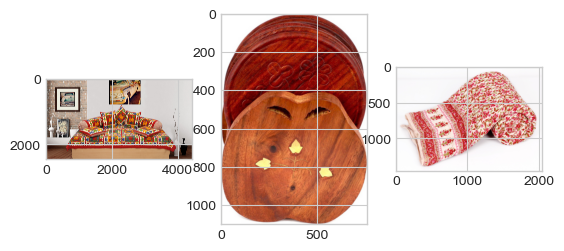

Baby Care


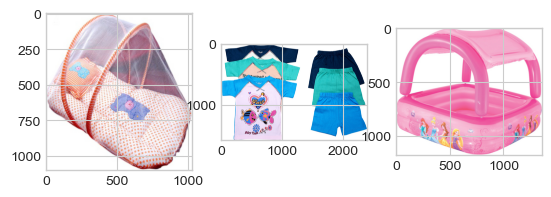

Watches


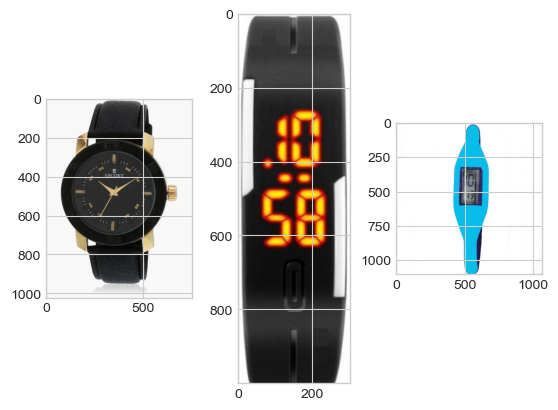

Home Decor & Festive Needs


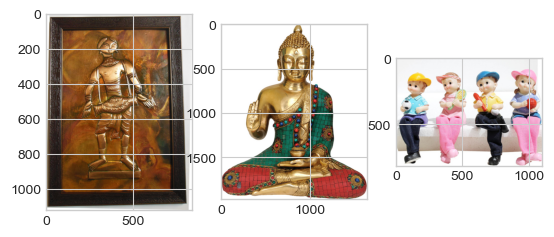

Kitchen & Dining


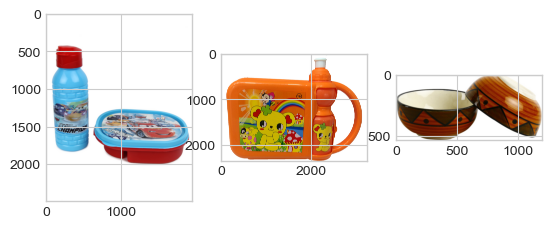

Beauty and Personal Care


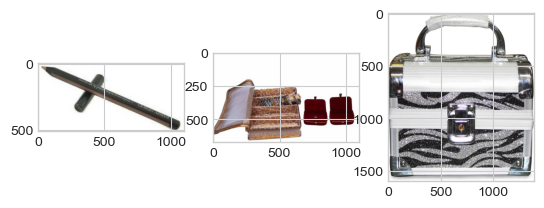

Computers


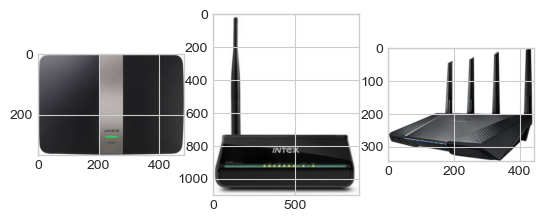

In [17]:
# Affichage d'exemples d'images par label
def list_fct(name):
    list_image_name = [df_images['image'][i] for i in range(len(df_images))
                       if df_images['Catégorie'][i] == name]
    return list_image_name


for name in Categories:
    print(name)

    for i in range(3):
        plt.subplot(130 + 1 + i)
        filename = path + list_fct(name)[i+10]
        image = imread(filename)
        plt.imshow(image)
    plt.show()

[Retour au sommaire](#Sommaire)
### Nettoyage des images <a class="anchor" id="Partie2_2"></a>

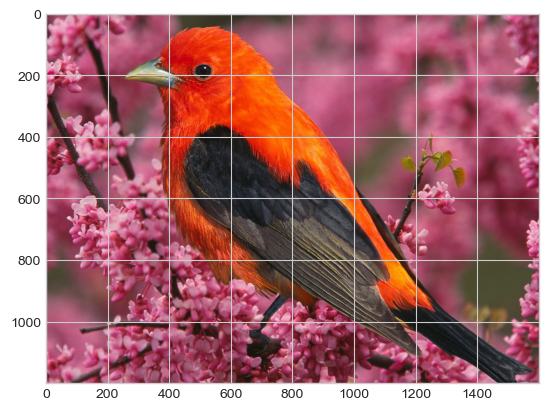

In [18]:
name = 'Images/d136aa676ef52b09eab65762940957fe.jpg'
img = Image.open(name)
plt.imshow(img)

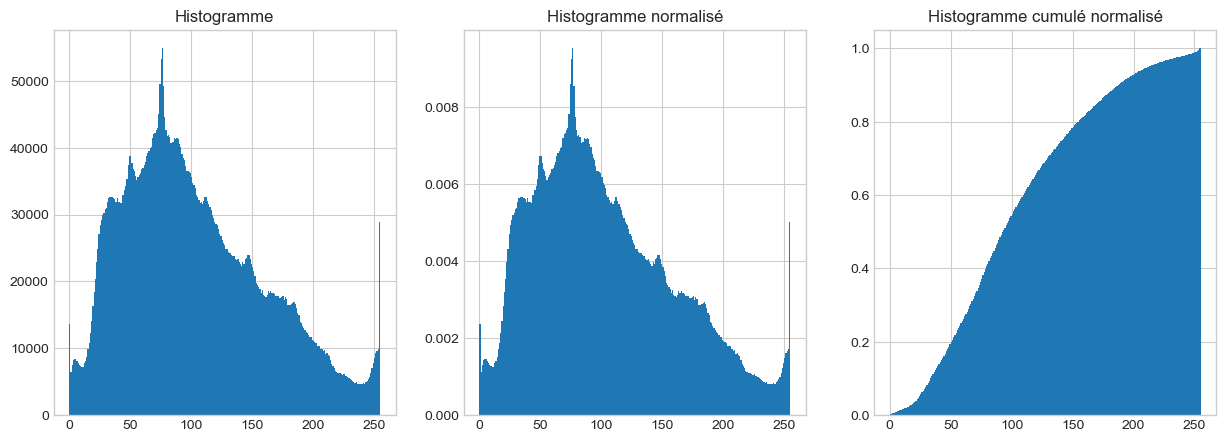

In [19]:
img_array = np.array(img)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(img_array.flatten(), bins=range(256))
plt.title('Histogramme')

plt.subplot(1, 3, 2)
plt.hist(img_array.flatten(), bins=range(256), density=True)
plt.title('Histogramme normalisé')

plt.subplot(1, 3, 3)
plt.hist(img_array.flatten(), bins=range(256), density=True, cumulative=True)
plt.title('Histogramme cumulé normalisé')

plt.show()

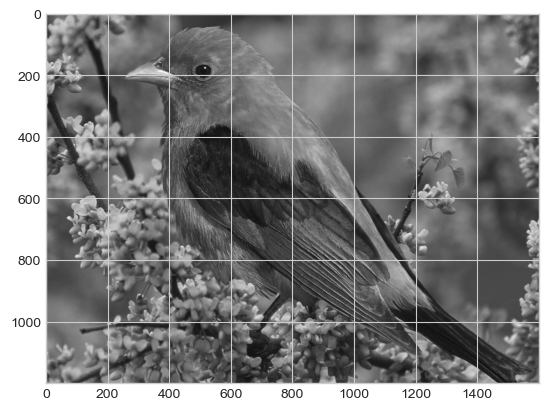

In [20]:
gray_img = img.convert('L')
#gray_img  = img_resize.convert('L')
gray_img_array = np.asarray(gray_img)
plt.imshow(gray_img_array, cmap='gray')
plt.show()

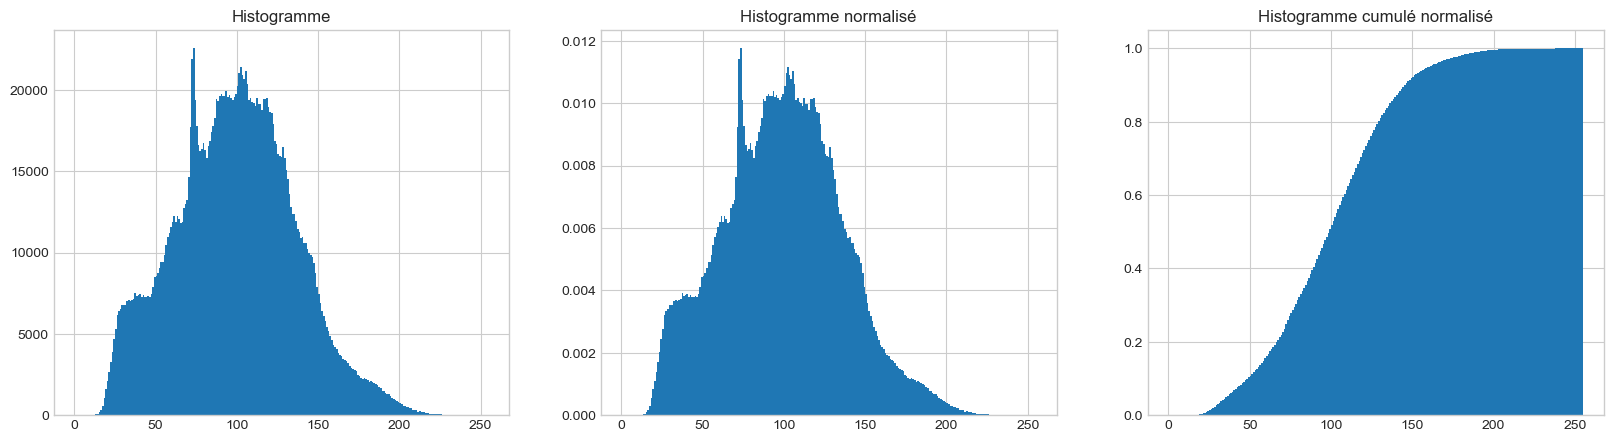

In [21]:
# Affichage des histogrammes
plt.figure(figsize=(20, 5))

plt.subplot(1, 3, 1)
plt.hist(gray_img_array.flatten(), bins=range(256))
plt.title('Histogramme')

plt.subplot(1, 3, 2)
plt.hist(gray_img_array.flatten(), bins=range(256), density=True)
plt.title('Histogramme normalisé')

plt.subplot(1, 3, 3)
plt.hist(gray_img_array.flatten(), bins=range(256), density=True,
         cumulative=True)
plt.title('Histogramme cumulé normalisé')

plt.show()

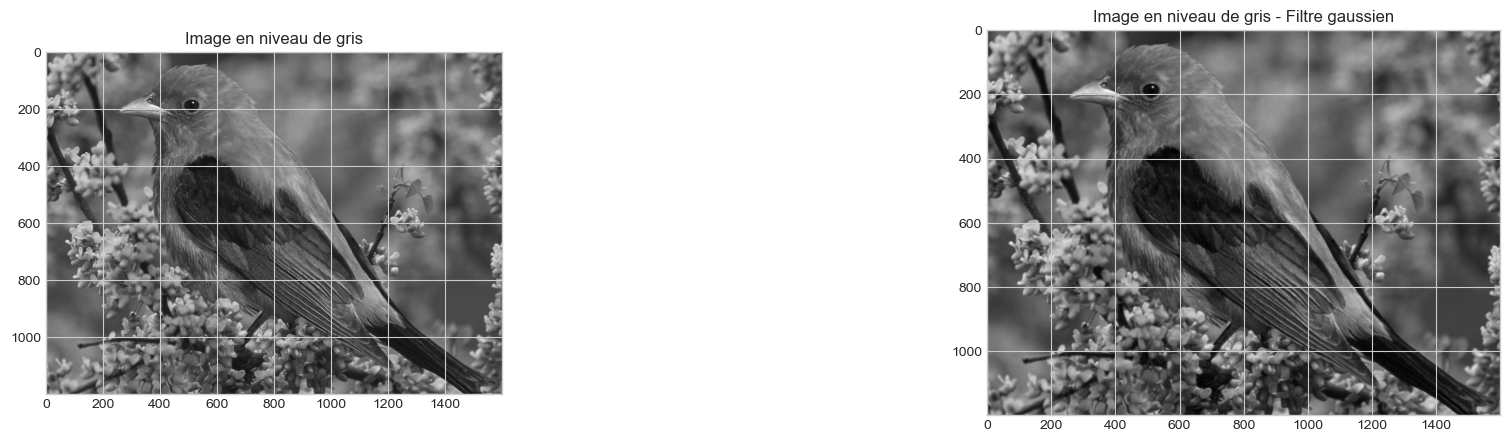

In [22]:
plt.figure(figsize=(20, 5))

plt.subplot(1, 3, 1)
plt.imshow(gray_img, cmap='gray')
plt.title('Image en niveau de gris')

# Filtre Moyenneur
img_moy = gray_img.filter(ImageFilter.BoxBlur(1))
# On filtre l'image avec un filtre moyenneur qui prend
# 1 pixel dans chaque direction (9 pixels dans le filtre)
img_moy_array = np.array(img_moy)

# Filtre Gaussien
img_gauss = img_moy.filter(ImageFilter.GaussianBlur(1))
img_gauss_array = np.array(img_gauss)
plt.subplot(1, 2, 2)
plt.imshow(img_gauss, cmap='gray')
plt.title('Image en niveau de gris - Filtre gaussien')

plt.show()

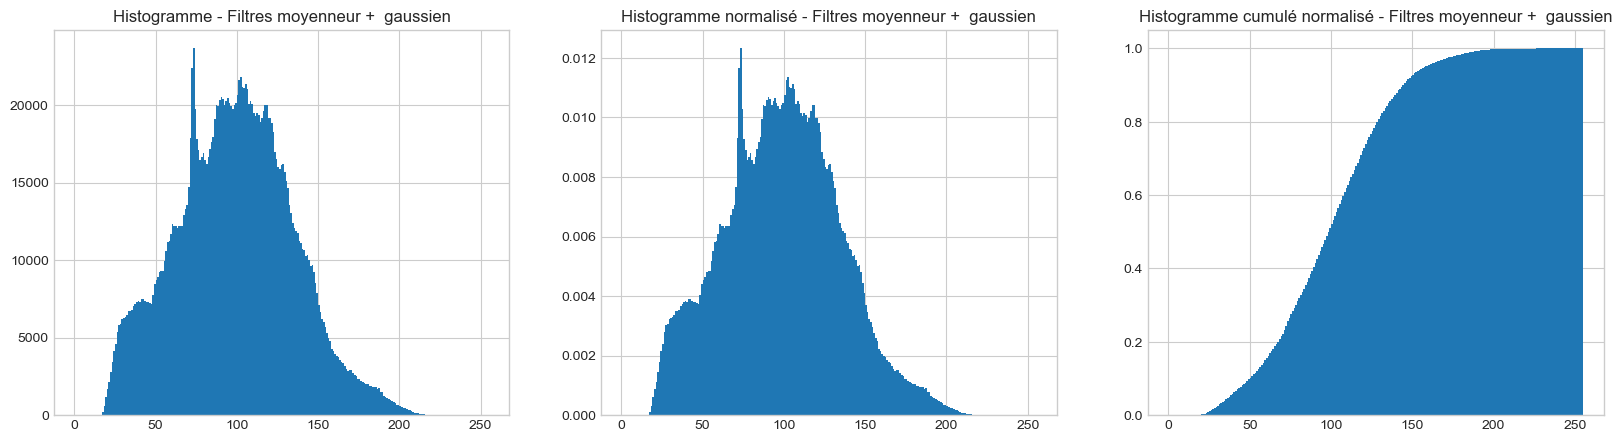

In [23]:
plt.figure(figsize=(20, 5))

plt.subplot(1, 3, 1)
plt.hist(img_gauss_array.flatten(), bins=range(256))
plt.title('Histogramme - Filtres moyenneur +  gaussien')

plt.subplot(1, 3, 2)
plt.hist(img_gauss_array.flatten(), bins=range(256), density=True)
plt.title('Histogramme normalisé - Filtres moyenneur +  gaussien')

plt.subplot(1, 3, 3)
plt.hist(img_gauss_array.flatten(), bins=range(256), density=True,
         cumulative=True)
plt.title('Histogramme cumulé normalisé - Filtres moyenneur +  gaussien')

plt.show()

### Etirement et égalisation de l'histogramme

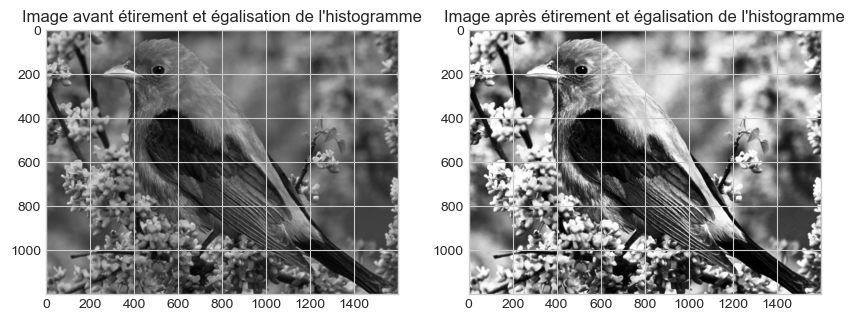

In [24]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img_gauss, cmap='gray')
plt.title('Image avant étirement et égalisation de l\'histogramme')

img_finale = ImageOps.equalize(ImageOps.autocontrast(img_gauss))
img_finale_array = np.array(img_finale)
plt.subplot(1, 2, 2)
plt.imshow(img_finale, cmap='gray')
plt.title('Image après étirement et égalisation de l\'histogramme')


plt.show()

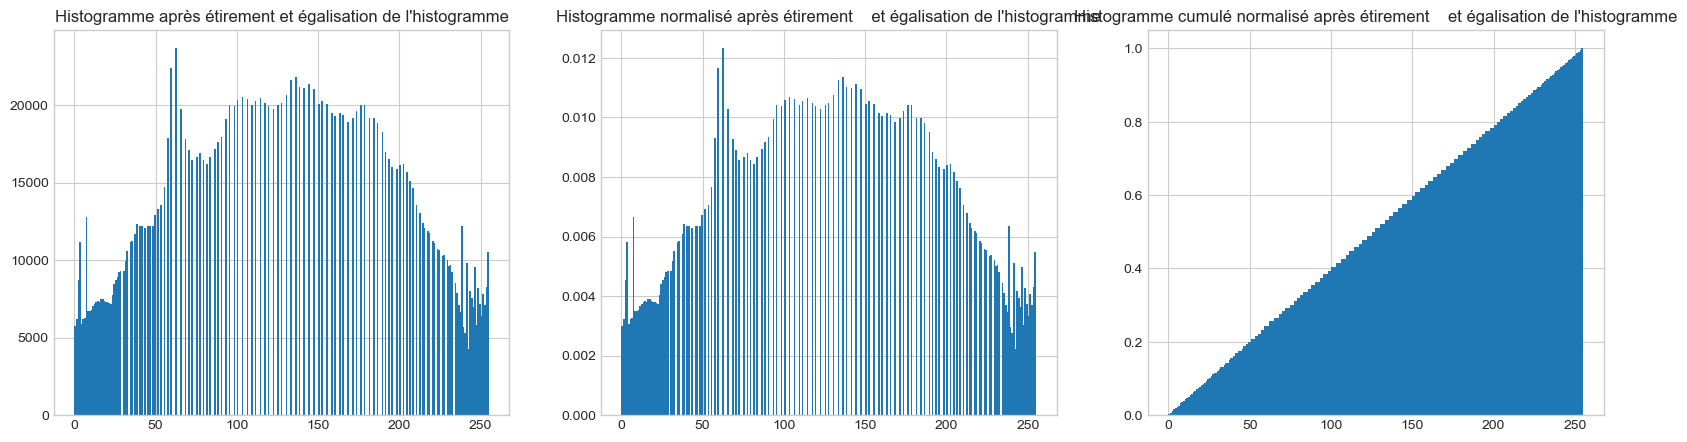

In [25]:
plt.figure(figsize=(20, 5))

plt.subplot(1, 3, 1)
plt.hist(img_finale_array.flatten(), bins=range(256))
plt.title('Histogramme après étirement et égalisation de l\'histogramme')

plt.subplot(1, 3, 2)
plt.hist(img_finale_array.flatten(), bins=range(256), density=True)
plt.title('Histogramme normalisé après étirement\
    et égalisation de l\'histogramme')

plt.subplot(1, 3, 3)
plt.hist(img_finale_array.flatten(), bins=range(256), density=True,
         cumulative=True)
plt.title('Histogramme cumulé normalisé après étirement\
    et égalisation de l\'histogramme')

plt.show()

[Retour au sommaire](#Sommaire)
### SIFT<a class="anchor" id="Partie2_3"></a>

In [26]:
#list_photos

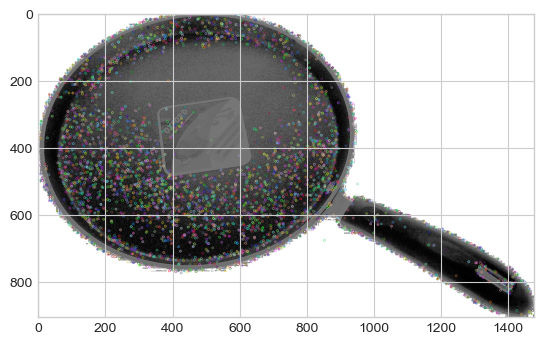

Descripteurs :  (4656, 128)

[[ 4.  2.  6. ...  5.  0.  0.]
 [96. 20.  0. ...  9.  2.  0.]
 [55. 16.  0. ...  0.  1.  0.]
 ...
 [12.  0.  0. ...  0.  0.  0.]
 [67. 19.  5. ...  0. 34. 13.]
 [ 0.  5. 27. ...  0.  0.  0.]]


In [27]:
sift = cv2.xfeatures2d.SIFT_create()
image = cv2.imread(path+list_photos[1],0) # convert in gray
image = cv2.equalizeHist(image)   # equalize image histogram
kp, des = sift.detectAndCompute(image, None)
img=cv2.drawKeypoints(image,kp,image)
plt.imshow(img)
plt.show()
print("Descripteurs : ", des.shape)
print()
print(des)

In [28]:
df_images.head()

image        Catégorie  Catégorie Numérique
0  55b85ea15a1536d46b7190ad6fff8ce7.jpg  Home Furnishing                    4
1  7b72c92c2f6c40268628ec5f14c6d590.jpg        Baby Care                    0
2  64d5d4a258243731dc7bbb1eef49ad74.jpg        Baby Care                    0
3  d4684dcdc759dd9cdf41504698d737d8.jpg  Home Furnishing                    4
4  6325b6870c54cd47be6ebfbffa620ec7.jpg  Home Furnishing                    4

In [29]:
# identification of key points and associated descriptors
sift_keypoints = []
temps1=time.time()
sift = cv2.xfeatures2d.SIFT_create()

for image_num in range(len(list_photos)) :
    if image_num%100 == 0 : print(image_num)
    name = cv2.imread(path+list_photos[image_num],0) # convert in gray
    #image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    res = cv2.equalizeHist(name)   # equalize image histogram
    kp, des = sift.detectAndCompute(res, None)
    sift_keypoints.append(des)

sift_keypoints_by_img = np.asarray(sift_keypoints,dtype="object")
sift_keypoints_all    = np.concatenate(sift_keypoints_by_img, axis=0)

print()
print("Nombre de descripteurs : ", sift_keypoints_all.shape)

duration1=time.time()-temps1
print("temps de traitement SIFT descriptor : ", "%15.2f" % duration1, "secondes")

0
100
200
300
400
500
600
700
800
900
1000

Nombre de descripteurs :  (9051350, 128)
temps de traitement SIFT descriptor :           464.85 secondes


In [30]:
# Determination number of clusters
temps1 = time.time()

k = int(round(np.sqrt(len(sift_keypoints_all)), 0))
print("Nombre de clusters estimés : ", k)
print("Création de", k, "clusters de descripteurs ...")

# Clustering
kmeans = cluster.MiniBatchKMeans(n_clusters=k, init_size=3*k, random_state=0)
kmeans.fit(sift_keypoints_all)

duration1 = time.time() - temps1
print("Temps de traitement kmeans : ", "%15.2f" % duration1, "secondes")

Nombre de clusters estimés :  3009
Création de 3009 clusters de descripteurs ...
Temps de traitement kmeans :           367.99 secondes


In [31]:
# Creation des histogrammes (features)
temps1 = time.time()

def build_histogram(kmeans, des, image_num):
    res = kmeans.predict(des)
    hist = np.zeros(len(kmeans.cluster_centers_))
    nb_des = len(des)
    if nb_des == 0: print("problème histogramme image  : ", image_num)
    for i in res:
        hist[i] += 1.0/nb_des
    return hist


# Creation of a matrix of histograms
hist_vectors = []

for i, image_desc in enumerate(sift_keypoints_by_img):
    if i%100 == 0 : print(i)
    hist = build_histogram(kmeans, image_desc, i)  # calculates the histogram
    hist_vectors.append(hist)  # histogram is the feature vector

im_features = np.asarray(hist_vectors)

duration1 = time.time() - temps1
print("Temps de création histogrammes : ", "%15.2f" % duration1, "secondes")

0
100
200
300
400
500
600
700
800
900
1000
Temps de création histogrammes :           195.38 secondes


In [32]:
#im_features = pd.DataFrame(im_features)
im_features

array([[0.00000000e+00, 0.00000000e+00, 1.92771084e-03, ...,
        0.00000000e+00, 2.40963855e-04, 4.81927711e-04],
       [0.00000000e+00, 1.28865979e-03, 2.14776632e-04, ...,
        2.14776632e-04, 4.29553265e-04, 0.00000000e+00],
       [7.58840492e-05, 1.51768098e-04, 3.79420246e-04, ...,
        8.34724541e-04, 1.51768098e-03, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 6.83994528e-04],
       [4.20698359e-04, 0.00000000e+00, 2.10349180e-04, ...,
        0.00000000e+00, 7.36222129e-04, 4.20698359e-04],
       [0.00000000e+00, 0.00000000e+00, 3.72628726e-03, ...,
        0.00000000e+00, 3.38753388e-04, 0.00000000e+00]])

Dimensions dataset avant réduction ACP :  (1050, 3009)
[[-0.53677785 -0.21827531  0.17614689 ... -0.28821514 -0.17046741
   0.34467666]
 [-0.53677785  2.04184896 -0.43232401 ... -0.16825051  0.20346174
  -0.55788098]
 [-0.40735437  0.04790414 -0.37383907 ...  0.17802469  2.36096715
  -0.55788098]
 ...
 [-0.53677785 -0.21827531 -0.50861726 ... -0.28821514 -0.64824296
   0.72310884]
 [ 0.18074115 -0.21827531 -0.43389673 ... -0.28821514  0.81151511
   0.2300059 ]
 [-0.53677785 -0.21827531  0.81503974 ... -0.28821514  0.0234266
  -0.55788098]]


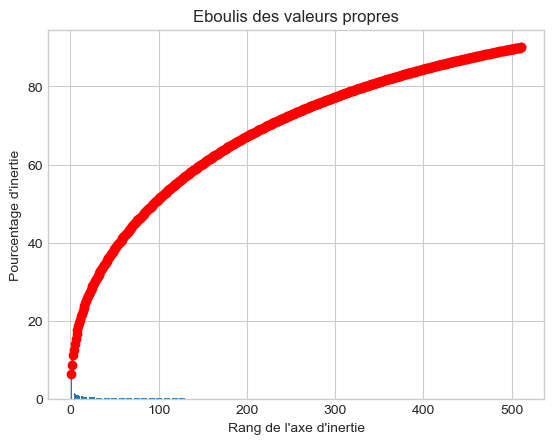

[[ 17.53735468  -5.19847897   4.3625455  ...  -1.01325926  -1.06135633
   -1.63114208]
 [ 32.98280512  25.28914529  13.57001183 ...   1.20055128  -0.70462208
   -0.41305733]
 [ 17.07332033  -5.73775117  15.89008215 ...   1.06297801   1.30325082
    1.3491015 ]
 ...
 [-17.07648119   9.01864624  -3.42075869 ...   0.35214445  -1.04139342
    0.53729619]
 [ 13.86314719  -8.79159172  -5.17730689 ...   0.10858374   0.65883034
   -0.63300807]
 [-12.00014942   9.93357021  -5.36341149 ...  -2.20345046   2.35451449
   -0.94554143]]
            0          1          2          3          4          5    \
0     17.537355  -5.198479   4.362545   2.255272  -6.062525  -0.868668   
1     32.982805  25.289145  13.570012 -10.621721   7.399105  -6.533906   
2     17.073320  -5.737751  15.890082   0.097657  13.648587  20.945460   
3     -3.895813   0.413530  -0.287472   6.531814  -9.355958   4.865654   
4      1.688228  -6.820518  10.092395  -2.174055 -12.863035   2.962701   
...         ...        ...  

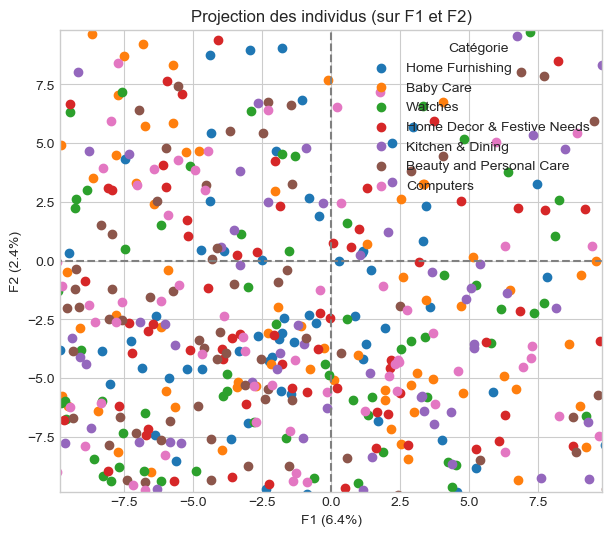

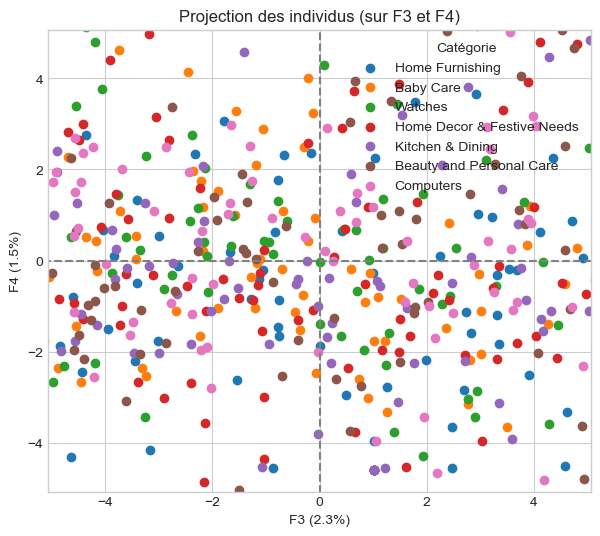

Dimensions dataset après réduction ACP :  (1050, 511)


In [33]:
#from sklearn import manifold, decomposition
im_features = pd.DataFrame(im_features)
print("Dimensions dataset avant réduction ACP : ", im_features.shape)
im_features['Catégorie'] = df_['Catégorie']
features_SIFT = ACP(im_features)
print("Dimensions dataset après réduction ACP : ", features_SIFT.shape)

In [34]:
features_SIFT.head()

0          1          2          3          4          5         6    \
0  17.537355  -5.198479   4.362545   2.255272  -6.062525  -0.868668 -2.555241   
1  32.982805  25.289145  13.570012 -10.621721   7.399105  -6.533906 -5.503753   
2  17.073320  -5.737751  15.890082   0.097657  13.648587  20.945460 -3.004183   
3  -3.895813   0.413530  -0.287472   6.531814  -9.355958   4.865654  3.538144   
4   1.688228  -6.820518  10.092395  -2.174055 -12.863035   2.962701  2.268307   

         7         8          9    ...       501       502       503  \
0 -15.116092  4.983375   2.810977  ... -0.417598 -1.233628 -0.826548   
1   7.089583 -1.994483   2.697016  ... -0.021362  1.364389  1.098854   
2  11.350790 -5.975119 -12.252853  ...  1.107922 -0.076359 -0.234265   
3 -15.622597 -4.200262  -0.554694  ...  2.726648  1.055806 -1.693094   
4   5.413322  4.292594  11.014966  ... -0.281890  0.244984 -0.463694   

        504       505       506       507       508       509       510  
0  0.269161 -0.457739  0.054535  0.211642 -1.013259 -1.061356 -1.631142  
1 -0.817013  0.465999  0.368997 -1.664061  1.200551 -0.704622 -0.413057  
2  1.315558  0.544043  1.706083 -0.404052  1.062978  1.303251  1.349101  
3  2.766435 -2.133041 -1.602311  0.004832  0.682637  2.569151 -1.146486  
4 -2.128206  0.472190 -0.054823 -1.339153  0.713332 -1.438183 -1.077477  

[5 rows x 511 columns]

ARI : 0.0025621017918463513


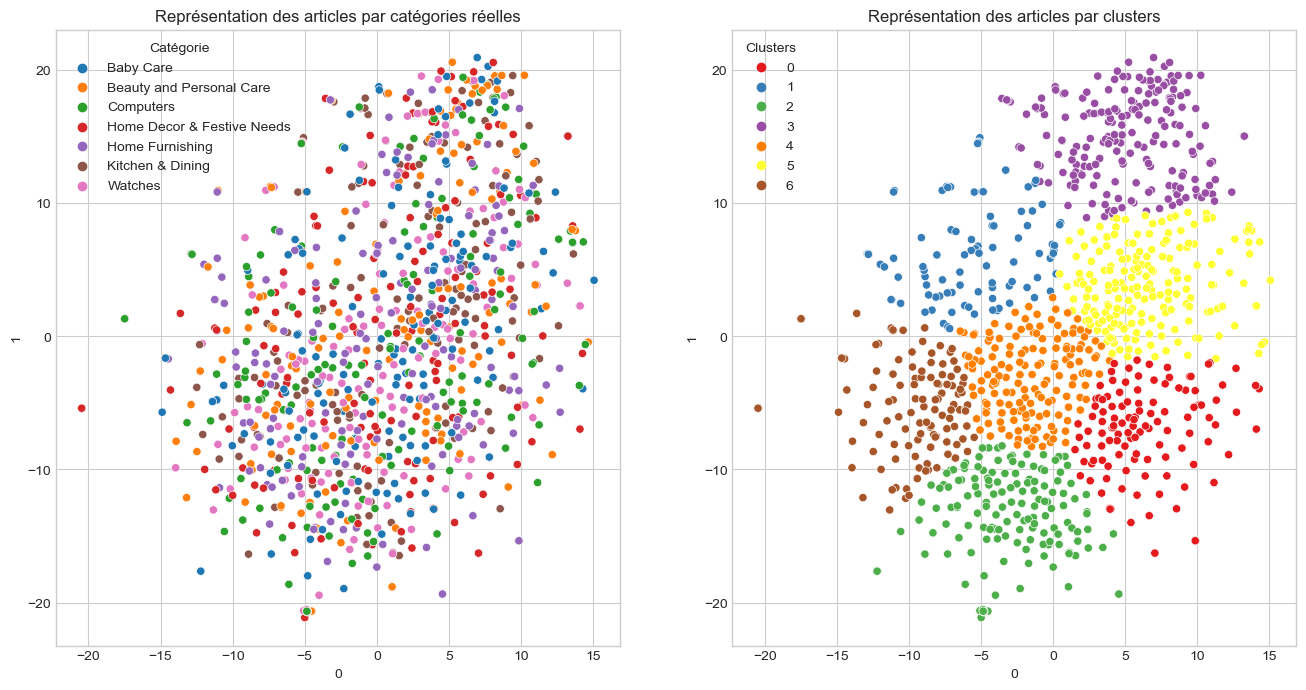

In [35]:
# t-sne
tsne = TSNE(n_components=2, init='pca', n_jobs=-1, random_state=6)
#X_tsne_SIFT = tsne.fit_transform(feat_pca_sift)
X_tsne_SIFT = tsne.fit_transform(features_SIFT)
ARI_SIFT, labels_SIFT = ARI(X_tsne_SIFT, df_images)
AfficheClusters(X_tsne_SIFT, df_images, labels_SIFT)

[Retour au sommaire](#Sommaire)

### ORB <a class="anchor" id="Partie2_4"></a>

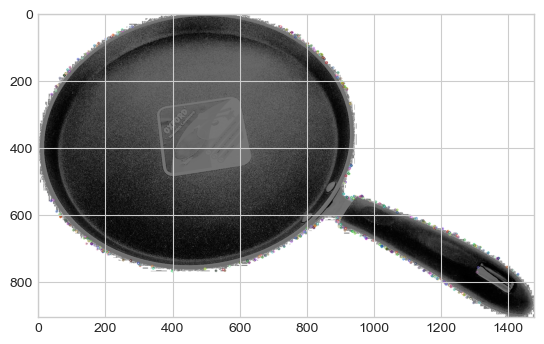

Descripteurs :  (500, 32)

[[ 20 184 156 ... 120 131 155]
 [166 237 192 ... 123 240 136]
 [164 237 132 ... 127 210 136]
 ...
 [ 70 237 214 ... 123 209 128]
 [ 98 168 212 ...   8  97 136]
 [182 173 198 ... 123 113 128]]


In [36]:
import cv2
import cv2 as cv
orb = cv.ORB_create()
image = cv2.imread(path+list_photos[1],0) # convertir en gris
image = cv2.equalizeHist(image)   # equalize image histogram
kp, des = orb.detectAndCompute(image, None)
img=cv2.drawKeypoints(image,kp,image)
plt.imshow(img)
plt.show()
print("Descripteurs : ", des.shape)
print()
print(des)

In [37]:
# identification des points clés et des descripteurs associés.
#import time, cv2
orb_keypoints = []
temps1=time.time()
orb = cv.ORB_create() # 500 descripteurs par image

for image_num in range(len(list_photos)) :
    if image_num%100 == 0 : print(image_num)
    image = cv2.imread(path+list_photos[image_num],0) # convertir en gris
    res = cv2.equalizeHist(image)   # égaliser l'histogramme de l'image
    kp, des = orb.detectAndCompute(res, None)
    orb_keypoints.append(des)

orb_keypoints_by_img = np.asarray(orb_keypoints,dtype="object")
orb_keypoints_all    = np.concatenate(orb_keypoints_by_img, axis=0)

print()
print("Nombre de descripteurs : ", orb_keypoints_all.shape)

duration1=time.time()-temps1
print("temps de traitement ORB descriptor : ", "%15.2f" % duration1, "secondes")

0
100
200
300
400
500
600
700
800
900
1000

Nombre de descripteurs :  (520145, 32)
temps de traitement ORB descriptor :            42.98 secondes


In [38]:
# Creation des clusters de descripteurs.

from sklearn import cluster, metrics

# Determination number of clusters
temps1=time.time()

# Il ya plusieurs possibilités pour calculer k dans la littérature. 2 principales : 
# - la racine carré du nombre total de descripteurs
k = int(round(np.sqrt(len(orb_keypoints_all)),0))
print("Nombre de clusters estimés : ", k)
print("Création de",k, "clusters de descripteurs ...")

# Clustering
kmeans = cluster.MiniBatchKMeans(n_clusters=k, init_size=3*k, random_state=0)
kmeans.fit(orb_keypoints_all)

duration1=time.time()-temps1
print("temps de traitement kmeans : ", "%15.2f" % duration1, "secondes")

Nombre de clusters estimés :  721
Création de 721 clusters de descripteurs ...
temps de traitement kmeans :            11.45 secondes


In [39]:
# Créations des histogrammes -Features).

# Création d'une matrice d'histogrammes
hist_vectors=[]

for i, image_desc in enumerate(orb_keypoints_by_img) :
    if i%100 == 0 : print(i)  
    hist = build_histogram(kmeans, image_desc, i) #calcule l'histogramme
    hist_vectors.append(hist) #l'histogramme est le vecteur caractéristique

im_features_ORB = np.asarray(hist_vectors)

duration1=time.time()-temps1
print()
print(im_features_ORB)
print()
print("temps de création histogrammes : ", "%15.2f" % duration1, "secondes")

0
100
200
300
400
500
600
700
800
900
1000

[[0.    0.    0.    ... 0.002 0.    0.004]
 [0.    0.    0.006 ... 0.    0.    0.   ]
 [0.006 0.008 0.002 ... 0.    0.002 0.   ]
 ...
 [0.002 0.    0.002 ... 0.    0.002 0.   ]
 [0.006 0.002 0.    ... 0.002 0.    0.004]
 [0.002 0.    0.012 ... 0.002 0.    0.   ]]

temps de création histogrammes :           234.49 secondes


Dimensions dataset avant réduction ACP :  (1050, 721)
[[-0.67356922 -0.55571893 -0.57832834 ...  0.43256155 -0.55504028
   0.92590472]
 [-0.67356922 -0.55571893  1.27790486 ... -0.55364237 -0.55504028
  -0.65629732]
 [ 1.51489533  4.13984849  0.04041606 ... -0.55364237  0.24762011
  -0.65629732]
 ...
 [ 0.05591896 -0.55571893  0.04041606 ... -0.55364237  0.24762011
  -0.65629732]
 [ 1.51489533  0.61817293 -0.57832834 ...  0.43256155 -0.55504028
   0.92590472]
 [ 0.05591896 -0.55571893  3.13413805 ...  0.43256155 -0.55504028
  -0.65629732]]


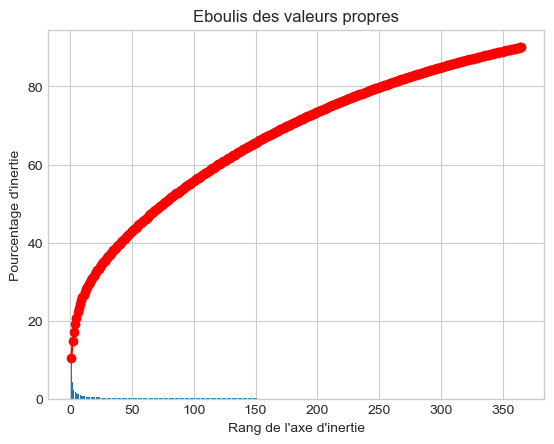

[[-7.72862461  6.54410108  2.17184655 ...  2.25926003 -1.16045033
  -1.04445045]
 [19.60144622  1.36493913 -2.31287269 ... -0.7934706   0.22805835
   0.37306859]
 [-7.16661184 -0.58317063 -0.49369073 ... -1.05179248 -0.454175
  -0.40118111]
 ...
 [ 3.13441753  1.42116151 -4.14581409 ...  0.94335183  0.09486123
   0.4568395 ]
 [-4.73788371  2.76025581  1.05369368 ...  0.25504507 -0.15689559
   0.50891191]
 [ 6.77865764 -3.74837909 -0.29223339 ... -0.69322624  0.39400358
  -0.16327228]]
            0         1         2         3         4         5         6    \
0     -7.728625  6.544101  2.171847 -1.961680 -2.610258  2.064644  1.000621   
1     19.601446  1.364939 -2.312873  6.899550 -4.773017  7.173013  9.466032   
2     -7.166612 -0.583171 -0.493691  6.107206 -1.869570 -4.357895  0.770838   
3      9.282465 -2.997049 -5.509744 -3.119836  1.601163  4.612393 -4.676661   
4     -2.937427 -9.715121 -4.466001 -2.612139 -2.347218  0.583168  5.184566   
...         ...       ...       ... 

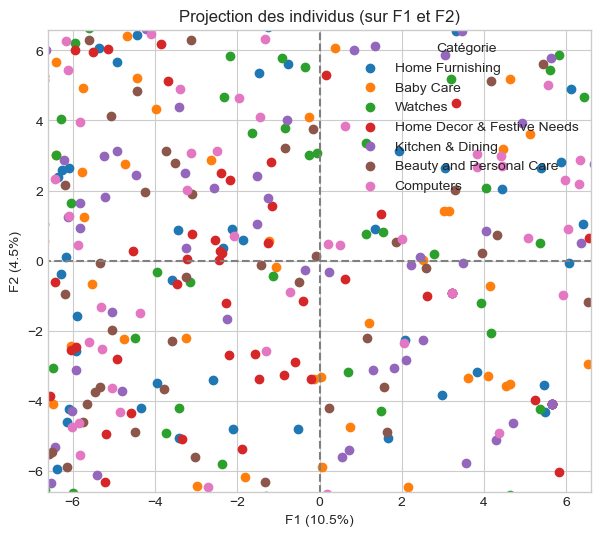

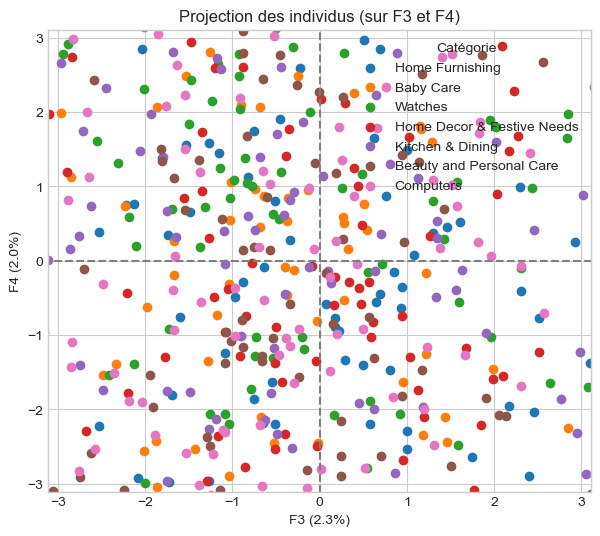

Dimensions dataset après réduction ACP :  (1050, 365)


In [40]:
#
im_features_ORB = pd.DataFrame(im_features_ORB)
print("Dimensions dataset avant réduction ACP : ", im_features_ORB.shape)
im_features_ORB['Catégorie'] = df_['Catégorie']
features_ORB = ACP(im_features_ORB)
print("Dimensions dataset après réduction ACP : ", features_ORB.shape)

In [41]:
features_ORB.head()

0         1         2         3         4         5         6    \
0  -7.728625  6.544101  2.171847 -1.961680 -2.610258  2.064644  1.000621   
1  19.601446  1.364939 -2.312873  6.899550 -4.773017  7.173013  9.466032   
2  -7.166612 -0.583171 -0.493691  6.107206 -1.869570 -4.357895  0.770838   
3   9.282465 -2.997049 -5.509744 -3.119836  1.601163  4.612393 -4.676661   
4  -2.937427 -9.715121 -4.466001 -2.612139 -2.347218  0.583168  5.184566   

        7         8         9    ...       355       356       357       358  \
0  1.687524  2.617847  1.402852  ...  0.220962 -0.702413 -0.698143 -0.812579   
1 -4.348653  5.819854 -0.766074  ...  0.624209 -0.193513  0.742721 -0.433299   
2 -1.428884 -0.703951  2.475123  ... -1.046651 -0.337609 -0.065629 -0.004047   
3 -1.034984 -1.065984  0.189116  ...  0.324204  0.487058  0.669151 -0.405840   
4 -1.332080 -3.169530  1.957843  ... -1.092308 -0.300819 -0.268204 -0.371912   

        359       360       361       362       363       364  
0  0.097281 -0.164237  0.466178  2.259260 -1.160450 -1.044450  
1  0.568693  0.728624  0.389510 -0.793471  0.228058  0.373069  
2 -0.145949  0.338913  0.956611 -1.051792 -0.454175 -0.401181  
3  0.475041 -0.108511 -1.665771  0.625642  1.788207  0.034922  
4 -0.214588  0.477443  0.592547 -0.741651  0.344178 -0.419428  

[5 rows x 365 columns]

ARI : 0.000676808252163749


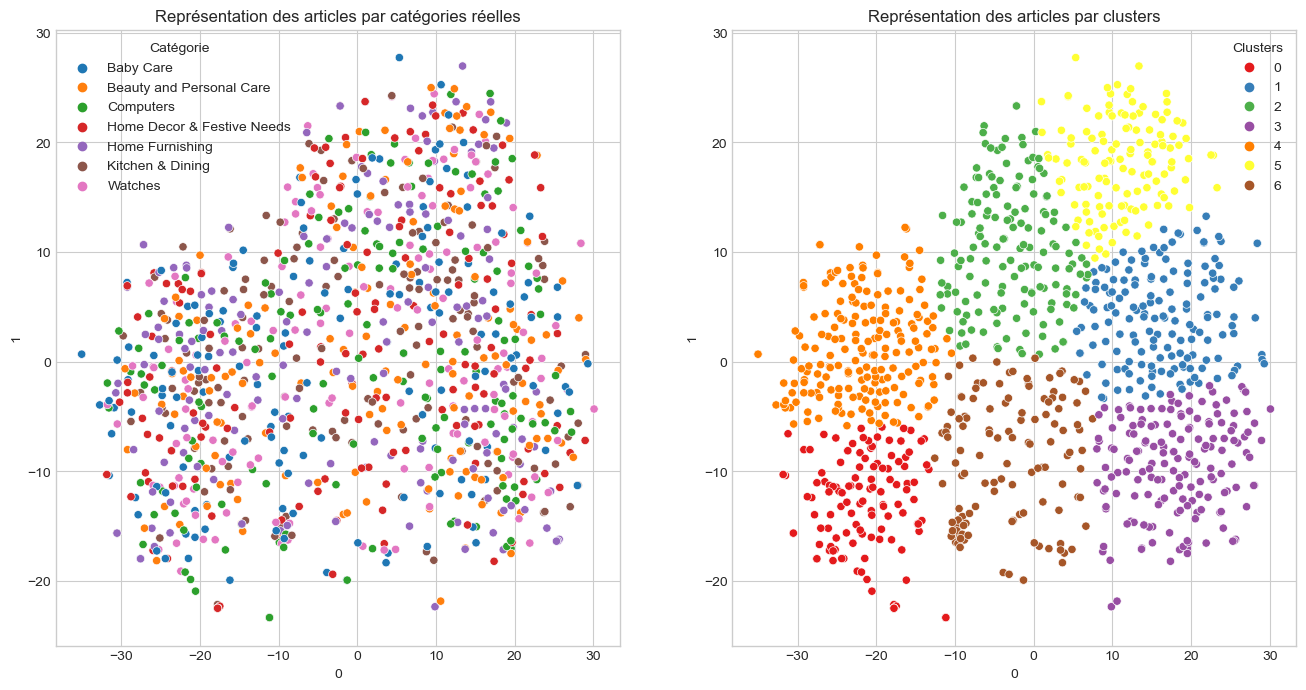

In [42]:
# t-sne
tsne = TSNE(n_components=2, init='pca', n_jobs=-1, random_state=6)
X_tsne_ORB = tsne.fit_transform(features_ORB)
ARI_ORB, labels_ORB = ARI(X_tsne_ORB, df_images)
AfficheClusters(X_tsne_ORB, df_images, labels_ORB)